# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#call API
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
    
request = requests.get(url)
request_json=request.json()
#print(json.dumps(request_json, indent=4, sort_keys=True))

#create list, counter and set
counter = 0
set = 1
name = []
lat = []
lng = []
temp = []
clouds = []
wind = []
humidity = []
country = []
date = []

print('Beginning Data Retrieval')     
print('-----------------------------')

#loop through city to retreive data, printing the cities and number
for city in cities: 
    try:
        weatherdata = (requests.get(url + '&q=' + city)).json()
        name.append(weatherdata['name'])
        lat.append(weatherdata['coord']['lat'])
        lng.append(weatherdata['coord']['lon'])
        temp.append(weatherdata['main']['temp'])
        clouds.append(weatherdata['clouds']['all'])
        wind.append(weatherdata['wind']['speed'])
        humidity.append(weatherdata['main']['humidity'])
        country.append(weatherdata['sys']['country'])
        date.append(weatherdata['dt'])
       
        print(f'Processing Record {counter} of Set {set} | {city}')
        if counter > 49:
            counter = 0
            set += 1 
        counter = counter + 1
        
    except KeyError:
        print(f'City not found. Skipping...')
        

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | butaritari
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | liverpool
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | srednekolymsk
Processing Record 6 of Set 1 | lethem
City not found. Skipping...
Processing Record 7 of Set 1 | udachnyy
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | jalu
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | vaini
City not found. Skipping...
Processing Record 16 of Set 1 | alto araguaia
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of

Processing Record 36 of Set 4 | cidreira
Processing Record 37 of Set 4 | igunga
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | prainha
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | lufkin
Processing Record 42 of Set 4 | salo
Processing Record 43 of Set 4 | mnogovershinnyy
Processing Record 44 of Set 4 | honningsvag
Processing Record 45 of Set 4 | sao gabriel da cachoeira
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | sirjan
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | ambovombe
Processing Record 1 of Set 5 | moyale
Processing Record 2 of Set 5 | red deer
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | tezu
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | san ramon
Processing Record 8 of Set 5 | gigmoto
Processing Record 

Processing Record 26 of Set 8 | limon
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | asyut
Processing Record 29 of Set 8 | dapaong
Processing Record 30 of Set 8 | owando
Processing Record 31 of Set 8 | avera
Processing Record 32 of Set 8 | abu kamal
Processing Record 33 of Set 8 | farroupilha
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | green river
Processing Record 37 of Set 8 | fomboni
Processing Record 38 of Set 8 | searcy
Processing Record 39 of Set 8 | bulgan
Processing Record 40 of Set 8 | ayan
Processing Record 41 of Set 8 | dmitriyevka
Processing Record 42 of Set 8 | lebanon
Processing Record 43 of Set 8 | abu road
Processing Record 44 of Set 8 | colesberg
Processing Record 45 of Set 8 | bubaque
Processing Record 46 of Set 8 | marion
Processing Record 47 of Set 8 | penzance
Processing Record 48 of Set 8 | nalut
Processing Record 49 of Set 8 | northport
Processing Record 50 o

Processing Record 15 of Set 12 | aripuana
Processing Record 16 of Set 12 | sarishabari
Processing Record 17 of Set 12 | saiha
Processing Record 18 of Set 12 | holme
Processing Record 19 of Set 12 | bergen
Processing Record 20 of Set 12 | arkadelphia
Processing Record 21 of Set 12 | necochea
Processing Record 22 of Set 12 | sayyan
Processing Record 23 of Set 12 | ardakan
Processing Record 24 of Set 12 | fairhope
Processing Record 25 of Set 12 | twentynine palms
Processing Record 26 of Set 12 | magaria
Processing Record 27 of Set 12 | pahrump
Processing Record 28 of Set 12 | iqaluit
Processing Record 29 of Set 12 | pionerskiy
Processing Record 30 of Set 12 | kondinskoye
Processing Record 31 of Set 12 | derzhavinsk
Processing Record 32 of Set 12 | jawhar
Processing Record 33 of Set 12 | poum
Processing Record 34 of Set 12 | houma
Processing Record 35 of Set 12 | bereda
Processing Record 36 of Set 12 | sadiqabad
Processing Record 37 of Set 12 | vanavara
Processing Record 38 of Set 12 | per

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe with required items
weatherdataDF = pd.DataFrame({'City': name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Cloudiness': clouds,
                            'Wind Speed': wind,
                            'Humidity': humidity,
                            'Country': country,
                            'Date': date})

#Save dataframe as csv
pd.DataFrame.to_csv(weatherdataDF, 'weatherdata.csv')

#print dataframe
weatherdataDF.head(10)

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Country,Date
0,Butaritari,3.07,172.79,82.04,79,12.84,75,KI,1604018114
1,Cape Town,-33.93,18.42,49.62,20,2.24,75,ZA,1604018114
2,Liverpool,53.41,-2.98,58.48,75,17.22,82,GB,1604017957
3,Taoudenni,22.68,-3.98,76.46,0,15.48,18,ML,1604018114
4,Tuktoyaktuk,69.45,-133.04,5.45,11,5.77,94,CA,1604018114
5,Srednekolymsk,67.45,153.68,5.68,100,0.27,94,RU,1604018114
6,Lethem,3.38,-59.80,83.84,84,5.35,63,GY,1604018115
7,Udachny,66.42,112.40,-10.55,62,1.59,89,RU,1604018115
8,Rikitea,-23.12,-134.97,75.45,100,7.65,74,PF,1604017914
9,Ushuaia,-54.80,-68.30,44.60,40,24.16,70,AR,1604018115


In [5]:
weatherdataDF.describe()

,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,21.070883,16.890900,57.272003,49.777589,7.634499,74.283531,1.604018e+09
std,32.417017,89.564318,21.820144,42.378475,5.196205,20.258434,7.592059e+01
min,-54.800000,-179.170000,-14.800000,0.000000,0.270000,7.000000,1.604018e+09
25%,-4.760000,-62.400000,44.170000,1.000000,3.670000,65.000000,1.604018e+09
50%,25.930000,21.700000,62.010000,48.000000,6.710000,79.000000,1.604018e+09
75%,47.330000,92.970000,75.740000,96.000000,10.290000,89.000000,1.604018e+09
max,78.220000,178.420000,91.450000,100.000000,29.970000,100.000000,1.604018e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# First filter out those rows which 
# does not contain any data 

clean_weatherDF= weatherdataDF.drop(weatherdataDF[weatherdataDF['Humidity'] > 100].index, inplace = False) 
clean_weatherDF.head(10)

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Country,Date
0,Butaritari,3.07,172.79,82.04,79,12.84,75,KI,1604018114
1,Cape Town,-33.93,18.42,49.62,20,2.24,75,ZA,1604018114
2,Liverpool,53.41,-2.98,58.48,75,17.22,82,GB,1604017957
3,Taoudenni,22.68,-3.98,76.46,0,15.48,18,ML,1604018114
4,Tuktoyaktuk,69.45,-133.04,5.45,11,5.77,94,CA,1604018114
5,Srednekolymsk,67.45,153.68,5.68,100,0.27,94,RU,1604018114
6,Lethem,3.38,-59.80,83.84,84,5.35,63,GY,1604018115
7,Udachny,66.42,112.40,-10.55,62,1.59,89,RU,1604018115
8,Rikitea,-23.12,-134.97,75.45,100,7.65,74,PF,1604017914
9,Ushuaia,-54.80,-68.30,44.60,40,24.16,70,AR,1604018115


In [7]:
clean_weatherDF.describe()

,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,21.070883,16.890900,57.272003,49.777589,7.634499,74.283531,1.604018e+09
std,32.417017,89.564318,21.820144,42.378475,5.196205,20.258434,7.592059e+01
min,-54.800000,-179.170000,-14.800000,0.000000,0.270000,7.000000,1.604018e+09
25%,-4.760000,-62.400000,44.170000,1.000000,3.670000,65.000000,1.604018e+09
50%,25.930000,21.700000,62.010000,48.000000,6.710000,79.000000,1.604018e+09
75%,47.330000,92.970000,75.740000,96.000000,10.290000,89.000000,1.604018e+09
max,78.220000,178.420000,91.450000,100.000000,29.970000,100.000000,1.604018e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

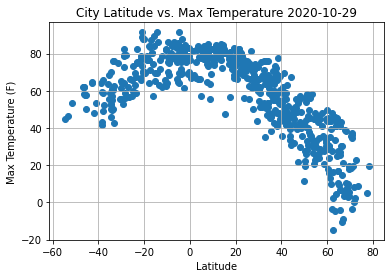

In [8]:
#Plot latitude vs temperature and save as .png
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Temperature'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Max Temperature {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output/latTemp.png')

#The scatter plot is showing us what the maximum temperature (F) is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Humidity Plot

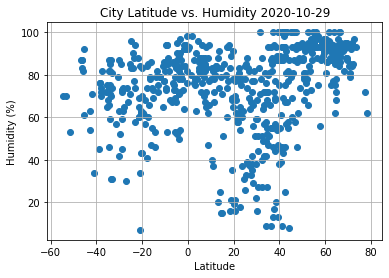

In [9]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Humidity'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output/latHumid.png')

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Cloudiness Plot

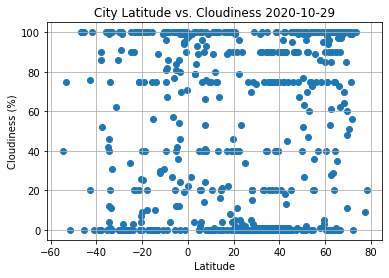

In [10]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Cloudiness'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output/latCloud.png')

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Wind Speed Plot

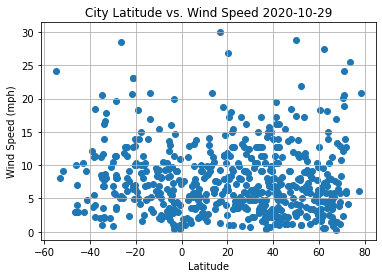

In [11]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Wind Speed'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output/latWind.png')

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Linear Regression

In [13]:
#find northern and southern hemisphere through .loc
northernhem = clean_weatherDF.loc[clean_weatherDF['Latitude'] >= 0]
southernhem = clean_weatherDF.loc[clean_weatherDF['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8706827333767158


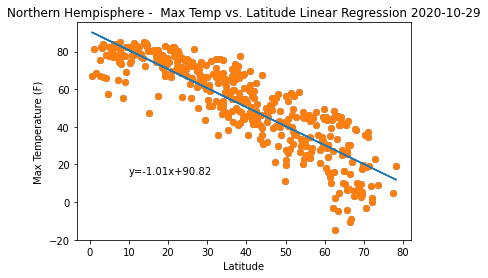

In [14]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Temperature"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Max Temp vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line, (10,15))
plt.savefig('output/NH_Temp.png')

#The scatter plot is showing us what the maximum temperature (F) is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a strong negative correlation between the two variables.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6665344237660032


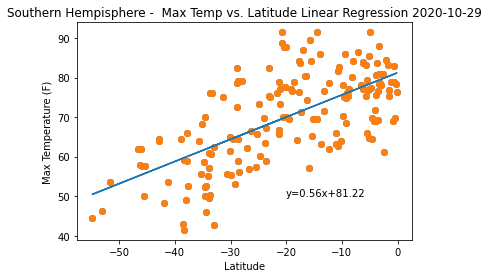

In [15]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Temperature"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Max Temp vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line, (-20,50))
plt.savefig('output/SH_Temp.png')

#The scatter plot is showing us what the maximum temperature is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a strong positive correlation between the two variables. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3333599955006606


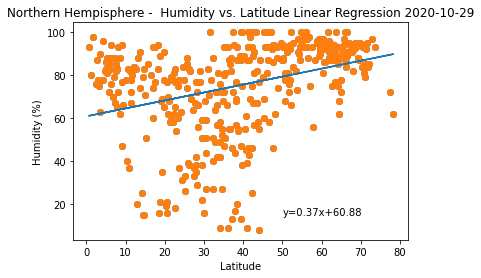

In [16]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Humidity"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Humidity vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line, (50,15))
plt.savefig('output/NH_Hum.png')

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a weak positive correlation between the two variables. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.23055901119791736


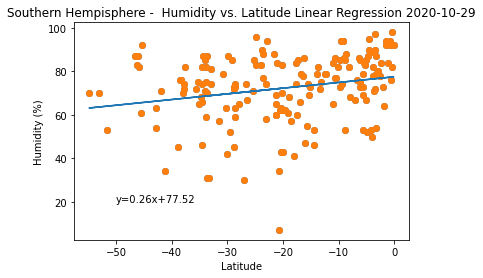

In [17]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Humidity"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Humidity vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line, (-50,20))
plt.savefig('output/SH_Hum.png')

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a hardly a correlation between the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2330729105830983


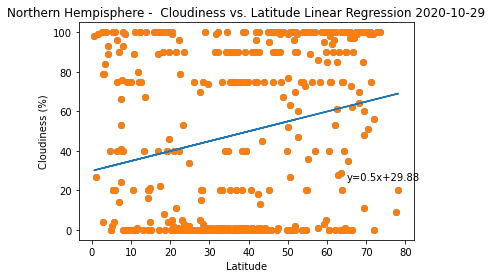

In [18]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Cloudiness"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Cloudiness vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (65,25))
plt.savefig('output/NH_Cloud.png')

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables, hardly any correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.17631293533557396


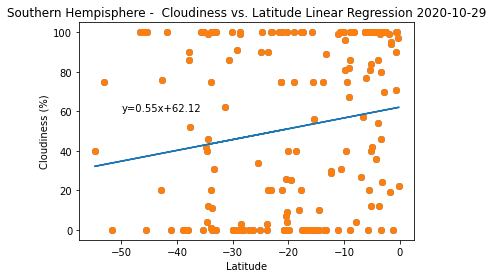

In [19]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Cloudiness"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Cloudiness vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (-50,60))
plt.savefig('output/SH_Cloud.png')

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.03863337805613168


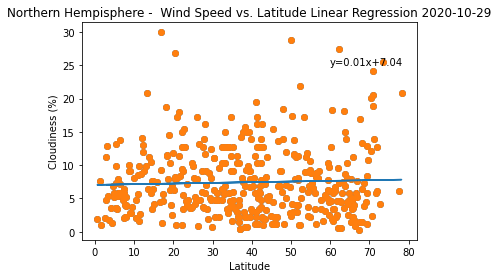

In [20]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Wind Speed"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Wind Speed vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (60,25))
plt.savefig('output/NH_Wind.png')

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables, hardly any correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.14244938855413145


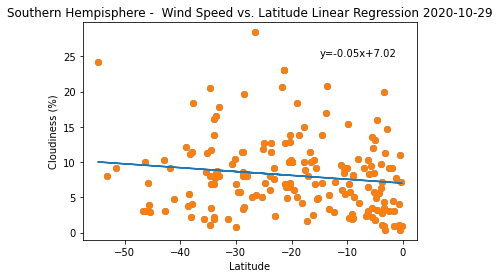

In [21]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Wind Speed"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Wind Speed vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (-15,25))
plt.savefig('output/SH_Wind.png')

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a very weak negative correlation between the two variables, hardly any correlation. 